In [3]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# shape (381109, 11)
data_1 = pd.read_csv('datasets/d1.csv')
# data_1 = data_1.drop(['id'], axis=1)

data_2 = pd.read_csv('datasets/d2.csv')

In [5]:
data_1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
data_1.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

<AxesSubplot:>

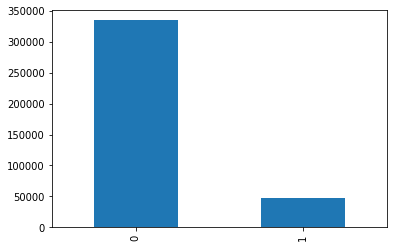

In [12]:
data = data_1.sample(5000)
data_1['Response'].value_counts().plot(kind='bar')

In [24]:
# Scaleing is a process of transforming data into a stander values so we can get the best of it
# 
# https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering
scaler =  StandardScaler()
scaled_column_names = ['Vintage','Annual_Premium']
data_cluster = data_1[scaled_column_names].copy()
scaled_data = scaler.fit_transform(data_cluster)
data_1[scaled_column_names] = scaled_data
data_1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,0.574539,26.0,0.748795,1
1,2,Male,76,1,3.0,0,1-2 Year,No,0.172636,26.0,0.342443,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,0.449053,26.0,-1.521998,1
3,4,Male,21,1,11.0,1,< 1 Year,No,-0.113018,152.0,0.581474,0
4,5,Female,29,1,41.0,1,< 1 Year,No,-0.178259,152.0,-1.378580,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,-0.022912,26.0,-0.792954,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,0.549093,152.0,-0.279037,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,0.264543,160.0,0.079509,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,0.816389,124.0,-0.960275,0


In [27]:
scaler.inverse_transform(scaled_data)

array([[ 0.57453868,  0.74879538],
       [ 0.17263624,  0.34244286],
       [ 0.4490531 , -1.52199808],
       ...,
       [ 0.26454281,  0.07950888],
       [ 0.81638891, -0.96027549],
       [ 0.6513986 ,  0.98782627]])

In [12]:
data = data_1.sample(5000)
le = LabelEncoder()
encoder_dict = dict()

for col in data:
    if col not in ['Annual_Premium', 'Vintage']:
        le = le.fit(data[col])
        data[col] = le.transform(data[col])
        encoder_dict[col] = le

np.save('FILE_NAME.npy', encoder_dict)
# encoder_dict = np.load('FILE_NAME.npy', allow_pickle=True).tolist()
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
45268,0,20,1,28,1,0,0,-0.019717,9,1.728822,0
357862,0,22,1,28,1,0,0,0.512086,60,-1.127597,0
140754,1,29,1,8,1,0,0,0.597370,21,1.430033,0
358091,0,25,1,28,0,0,1,0.631588,21,0.844408,0
102255,1,24,1,28,1,0,0,0.819294,30,1.298566,0


In [165]:
clustering = DBSCAN(eps=3, min_samples=2).fit(data.Annual_Premium)
clustering.labels_

ValueError: Expected 2D array, got 1D array instead:
array=[  2630.   2630.   2630. ... 122795. 133355. 315565.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [128]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16])

In [133]:
data['nn'] = clustering.labels_
data.head(1000)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,nn
35908,0,32,1,14,0,0,1,2630.0,20,164,0,-1
145602,1,31,1,46,0,0,1,2630.0,52,179,0,-1
179137,0,19,1,46,0,0,1,2630.0,20,228,1,-1
186933,1,3,1,50,1,1,0,2630.0,69,167,0,-1
95818,1,7,1,3,1,1,0,2630.0,69,143,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
235870,1,41,1,30,1,0,0,20819.0,69,31,0,-1
274441,1,0,1,25,1,1,0,20857.0,76,85,0,-1
240344,0,35,1,3,1,0,0,20861.0,49,211,0,-1
53718,0,58,1,28,0,0,1,20891.0,52,92,0,-1
